# Introduction

During the COVID pandemic, there are many people lost their job or faced decrease of their salary. In order to increase one's income, real estate investment is one option. Under COVID pandemic situation, some people decide to release their property due to financial difficulties so that this is the best timing to invest on real estate! When you are really investing on real estate, you would like to know where will rise its value most. Here we focus on Osaka city because it is expected to grow where Olympic and Expo are scheduled. Originally Osaka area is well known for its historical and commercial value in Japan.

# Data

Data source(sorry some data sources are in Japanese)

1.Land price data in 2018(https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-L01-v2_5.html)

2.venue information(https://ja.foursquare.com/city-guide)

My target is to predict the price change ratio from 2010 which I obtained information from Data.1 Land price is mainly determined by its enviromnent.For venue information I obtained from Data1 and Data2 By using Foursquare API, I obain information of venues around the location.(in this case we chose 500m which is around 10 min walk). And additional information such as distance from the closest station is obtained from Data1

## Data cleansing

In the data cleansing section, I  got one hot coding based on venue categories and the total number of venues registered in "Foursquare" because the land price and the number of venues seem to be connected. Also the kinds of shops should be related to the land price. 

In [1]:
import numpy as np 
import pandas as pd
import sklearn
# !conda install requests
import requests
# !conda install beautifulsoup4
from bs4 import BeautifulSoup 
print("done!")

done!


In [2]:
import json
json_open = open('L01-20_27.geojson', 'r',encoding="utf-8")
json_load = json.load(json_open)
print(json_load)


{'type': 'FeatureCollection', 'name': 'L01-20_27', 'crs': {'type': 'name', 'properties': {'name': 'EPSG:4612'}}, 'features': [{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [135.524715, 34.725005]}, 'properties': {'L01_001': '000', 'L01_002': '001', 'L01_003': '000', 'L01_004': '001', 'L01_005': '2020', 'L01_006': '193000', 'L01_007': '1', 'L01_008': 'false', 'L01_009': 'false', 'L01_010': 'false', 'L01_011': 'false', 'L01_012': 'false', 'L01_013': 'true', 'L01_014': 'false', 'L01_015': 'false', 'L01_016': 'false', 'L01_017': 'false', 'L01_018': 'false', 'L01_019': 'false', 'L01_020': 'false', 'L01_021': '27102', 'L01_022': '都島', 'L01_023': '大阪府\u3000大阪市都島区毛馬町５－６－２４', 'L01_024': '185', 'L01_025': '住宅', 'L01_026': '_', 'L01_027': 'LS2', 'L01_028': 'true', 'L01_029': 'true', 'L01_030': 'true', 'L01_031': '_', 'L01_032': '1.0', 'L01_033': '1.5', 'L01_034': '2', 'L01_035': '0', 'L01_036': '市道', 'L01_037': '南東', 'L01_038': '6.0', 'L01_039': '_', 'L01_040': '_', 'L01_041': 

In [31]:
address=[]
price_of_10yr=[]
price=[]
dist_sta=[]
lon=[]
lat=[]
price_change=[]

for i in range(len(json_load["features"])):
    print(float(json_load["features"][i]['properties']['L01_089']))
    if json_load["features"][i]['properties']['L01_089']!="0":#if tthere is no price  5 years ago,I omitted the location 
        
        address.append(json_load["features"][i]['properties']['L01_023'])#get all the address
        price.append(float(json_load["features"][i]['properties']['L01_006']))#get current price
        price_of_10yr.append(float(json_load["features"][i]['properties']['L01_089']))#get all price of 10yrs ago
        dist_sta.append(float(json_load["features"][i]['properties']['L01_046']))#get all dist from the closest station
        lon.append(json_load["features"][i]['geometry']['coordinates'][0])#get all longitude
        lat.append(json_load["features"][i]['geometry']['coordinates'][1])#get all latitude
        price_change.append(float(json_load["features"][i]['properties']['L01_006'])/
                            (float(json_load["features"][i]['properties']['L01_089']))*100)

    
df=pd.DataFrame({"Address":address,"Price_change":price_change,"Current_price":price, "Price_5yrs_ago":price_of_10yr,"Distance_from_station": dist_sta,
                  "Longitude":lon,"Latitude":lat})


191000.0
246000.0
277000.0
265000.0
273000.0
283000.0
278000.0
277000.0
541000.0
428000.0
444000.0
273000.0
276000.0
251000.0
219000.0
278000.0
268000.0
0.0
294000.0
467000.0
580000.0
801000.0
406000.0
345000.0
646000.0
419000.0
226000.0
190000.0
147000.0
210000.0
186000.0
181000.0
248000.0
316000.0
77000.0
0.0
310000.0
616000.0
800000.0
468000.0
481000.0
740000.0
555000.0
400000.0
0.0
1820000.0
545000.0
282000.0
1160000.0
998000.0
526000.0
832000.0
299000.0
1020000.0
320000.0
633000.0
259000.0
243000.0
250000.0
213000.0
213000.0
235000.0
0.0
0.0
349000.0
359000.0
215000.0
322000.0
94500.0
205000.0
171000.0
186000.0
192000.0
203000.0
192000.0
319000.0
87600.0
70500.0
132000.0
372000.0
572000.0
382000.0
410000.0
437000.0
598000.0
462000.0
523000.0
661000.0
835000.0
613000.0
269000.0
295000.0
502000.0
290000.0
578000.0
335000.0
253000.0
346000.0
280000.0
396000.0
348000.0
334000.0
205000.0
202000.0
139000.0
169000.0
146000.0
178000.0
169000.0
181000.0
182000.0
131000.0
0.0
280000.0
12500

In [32]:
df

Address  Price_change  Current_price  Price_5yrs_ago  \
0         大阪府　大阪市都島区毛馬町５－６－２４    101.047120       193000.0        191000.0   
1         大阪府　大阪市都島区御幸町１－６－２６    105.691057       260000.0        246000.0   
2        大阪府　大阪市都島区都島北通２－８－１０    106.859206       296000.0        277000.0   
3          大阪府　大阪市都島区中野町２－９－９    106.792453       283000.0        265000.0   
4       大阪府　大阪市都島区都島中通２－１１－１７    105.128205       287000.0        273000.0   
...                       ...           ...            ...             ...   
1608     大阪府　南河内郡河南町さくら坂１－５－４     92.717087        33100.0         35700.0   
1609    大阪府　南河内郡河南町大宝１丁目３２番３４     95.168067        45300.0         47600.0   
1610     大阪府　南河内郡河南町大字大ヶ塚２０５番     92.352941        31400.0         34000.0   
1611       大阪府　南河内郡河南町大字中９２７番     92.531120        22300.0         24100.0   
1612  大阪府　南河内郡千早赤阪村大字小吹６８番１９９     84.337349        28000.0         33200.0   

      Distance_from_station   Longitude   Latitude  
0                     750.0  135.524715  34.725005  
1                     770.0  135.534446  34.713398  
2                     550.0  135.532872  34.709750  
3                     730.0  135.526044  34.700626  
4                    1000.0  135.532954  34.704014  
...                     ...         ...        ...  
1608                 7100.0  135.647344  34.476641  
1609                 4300.0  135.634600  34.503745  
1610                 3200.0  135.627015  34.505629  
1611                 5500.0  135.634038  34.476306  
1612                 4400.0  135.605827  34.440221  

[1613 rows x 7 columns]

In [42]:
df.describe()

Price_change  Current_price  Price_5yrs_ago  Distance_from_station  \
count   1613.000000   1.613000e+03    1.613000e+03            1613.000000   
mean     107.220859   3.452800e+05    2.443702e+05            1058.741476   
std       22.070141   1.388923e+06    6.505646e+05            1141.182657   
min       81.723626   1.010000e+04    1.090000e+04               0.000000   
25%       98.940998   9.900000e+04    1.000000e+05             400.000000   
50%      100.355030   1.480000e+05    1.460000e+05             750.000000   
75%      104.587156   2.150000e+05    2.070000e+05            1400.000000   
max      300.523560   2.870000e+07    1.180000e+07           17000.000000   

         Longitude     Latitude  
count  1613.000000  1613.000000  
mean    135.521207    34.646214  
std       0.096136     0.135543  
min     135.121440    34.312867  
25%     135.470988    34.542923  
50%     135.527129    34.665794  
75%     135.590025    34.757811  
max     135.731108    34.982564

Refined data by choosing only location in Osaka city 

In [71]:
df2=df[df["Address"].str.contains("大阪市")]

df2=df2.sort_values(by=["Price_change"],ascending=False)
df2.head(20)

        

Address  Price_change  Current_price  Price_5yrs_ago  \
360   大阪府　大阪市中央区宗右衛門町７－２    300.523560     28700000.0       9550000.0   
342     大阪府　大阪市北区茶屋町１２－６    296.078431      7550000.0       2550000.0   
377  大阪府　大阪市中央区道頓堀１－６－１０    284.452297      8050000.0       2830000.0   
339    大阪府　大阪市北区芝田１－４－１４    266.363636      5860000.0       2200000.0   
266   大阪府　大阪市淀川区宮原３－５－２４    230.392157      2350000.0       1020000.0   
381  大阪府　大阪市中央区心斎橋筋２－８－５    226.118501     18700000.0       8270000.0   
89   大阪府　大阪市浪速区日本橋４－７－２０    224.913495      1300000.0        578000.0   
382  大阪府　大阪市中央区日本橋１－２１－６    218.978102      1500000.0        685000.0   
329     大阪府　大阪市北区小松原町４－５    217.037037      2930000.0       1350000.0   
354     大阪府　大阪市北区大深町４－２０    211.864407     25000000.0      11800000.0   
87     大阪府　大阪市浪速区元町３－１－４    209.163347      1050000.0        502000.0   
394   大阪府　大阪市中央区難波３－６－１１    200.000000      9240000.0       4620000.0   
376  大阪府　大阪市中央区西心斎橋１－４－５    194.940476     13100000.0       6720000.0   
399  大阪府　大阪市中央区南船場４－４－２１    194.495413     10600000.0       5450000.0   
94   大阪府　大阪市浪速区日本橋３－８－１５    193.686869       767000.0        396000.0   
48     大阪府　大阪市西区北堀江２－４－４    193.509615      1610000.0        832000.0   
35    大阪府　大阪市西区立売堀１－９－１５    193.181818      1190000.0        616000.0   
352     大阪府　大阪市北区堂島１－２－９    192.222222      1730000.0        900000.0   
38    大阪府　大阪市西区江戸堀１－２７－７    191.476091       921000.0        481000.0   
392    大阪府　大阪市中央区難波２－３－７    190.833333      2290000.0       1200000.0   

     Distance_from_station   Longitude   Latitude  
360                  230.0  135.501549  34.669292  
342                  110.0  135.498642  34.706924  
377                  450.0  135.502315  34.668833  
339                  250.0  135.497131  34.706458  
266                  400.0  135.495000  34.733834  
381                  220.0  135.501096  34.671429  
89                   250.0  135.506118  34.659184  
382                  190.0  135.506853  34.665713  
329                  230.0  135.500972  34.702672  
354                    0.0  135.494878  34.704329  
87                   400.0  135.497462  34.660489  
394                    0.0  135.500740  34.666397  
376                    0.0  135.499942  34.672943  
399                    0.0  135.499890  34.675776  
94                   450.0  135.505104  34.661659  
48                   250.0  135.492692  34.673139  
35                   500.0  135.494856  34.679161  
352                  380.0  135.498980  34.696359  
38                   450.0  135.493177  34.687731  
392                    0.0  135.499145  34.667522

In [103]:
df2.shape

(487, 7)

In [302]:

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [107]:
# @hidden_cell
CLIENT_ID = 'CI4305PX4XGCM3IVSCE0KBJX43WSOKMJWIDPPGFV0STOE2UX' # your Foursquare ID
CLIENT_SECRET = 'FWW4ORH5E250I3RMA02Y3YXKJYERQSJXCFQAHZOC0ARTZJKB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 1000 # A default Foursquare API limit value

# print('Your credentails:')
# print('CLIENT_ID: ' + CLIENT_ID)
# print('CLIENT_SECRET:' + CLIENT_SECRET)

In [111]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    n=0
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        print(name,n)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        n+=1

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [112]:
osaka_venues =getNearbyVenues(names=df2['Address'],
                                   latitudes=df2['Latitude'],
                                   longitudes=df2['Longitude'])

大阪府　大阪市中央区宗右衛門町７－２ 0
大阪府　大阪市北区茶屋町１２－６ 1
大阪府　大阪市中央区道頓堀１－６－１０ 2
大阪府　大阪市北区芝田１－４－１４ 3
大阪府　大阪市淀川区宮原３－５－２４ 4
大阪府　大阪市中央区心斎橋筋２－８－５ 5
大阪府　大阪市浪速区日本橋４－７－２０ 6
大阪府　大阪市中央区日本橋１－２１－６ 7
大阪府　大阪市北区小松原町４－５ 8
大阪府　大阪市北区大深町４－２０ 9
大阪府　大阪市浪速区元町３－１－４ 10
大阪府　大阪市中央区難波３－６－１１ 11
大阪府　大阪市中央区西心斎橋１－４－５ 12
大阪府　大阪市中央区南船場４－４－２１ 13
大阪府　大阪市浪速区日本橋３－８－１５ 14
大阪府　大阪市西区北堀江２－４－４ 15
大阪府　大阪市西区立売堀１－９－１５ 16
大阪府　大阪市北区堂島１－２－９ 17
大阪府　大阪市西区江戸堀１－２７－７ 18
大阪府　大阪市中央区難波２－３－７ 19
大阪府　大阪市中央区南船場２－３－６ 20
大阪府　大阪市西区西本町２－１－３４ 21
大阪府　大阪市西区南堀江１－２－１４ 22
大阪府　大阪市浪速区幸町３－７－１１ 23
大阪府　大阪市西区西本町１－５－９ 24
大阪府　大阪市浪速区恵美須東１－１７－１４ 25
大阪府　大阪市西区北堀江１－１４－２４ 26
大阪府　大阪市北区中之島２－２－２ 27
大阪府　大阪市西区南堀江２－１３－３０ 28
大阪府　大阪市西区江戸堀２－２－１ 29
大阪府　大阪市西区京町堀３丁目３３番１外 30
大阪府　大阪市中央区高麗橋４－６－１７ 31
大阪府　大阪市中央区瓦町２－６－９ 32
大阪府　大阪市北区堂島２－３－２ 33
大阪府　大阪市中央区北浜３－１－１８ 34
大阪府　大阪市西区南堀江４－２０－１１ 35
大阪府　大阪市北区東天満１－７－１７ 36
大阪府　大阪市西区江之子島１－９－１５ 37
大阪府　大阪市中央区谷町６－４－３ 38
大阪府　大阪市北区野崎町９－１３ 39
大阪府　大阪市中央区平野町３－２－８ 40
大阪府　大阪市福島区福島７－２１－１７ 41
大阪府　大阪市北区梅田１－８－１７ 42
大阪府　大阪市中央区今橋２－４－１０ 43
大阪府　大阪市中央区難波１－８－２ 44
大阪府　大阪市中央区南船場１－１１－９ 45
大阪

大阪府　東大阪市森河内東２－１７－７ 354
大阪府　東大阪市吉田本町３－２－３２ 355
大阪府　東大阪市永和３－１０－１６ 356
大阪府　東大阪市加納８－２－１２ 357
大阪府　東大阪市中野２－４－４ 358
大阪府　東大阪市中新開１－１４－４ 359
大阪府　東大阪市宝持２－９－６ 360
大阪府　東大阪市新庄１－６－１２ 361
大阪府　東大阪市新池島町２－１５－５ 362
大阪府　東大阪市西岩田４－２－１１ 363
大阪府　東大阪市東石切町４－７－１ 364
大阪府　東大阪市森河内西１－３０－１３ 365
大阪府　東大阪市松原１－１０－１２ 366
大阪府　東大阪市吉田１－１２－２４ 367
大阪府　東大阪市菱屋東１－１３－８ 368
大阪府　東大阪市四条町１－１７ 369
大阪府　東大阪市稲田本町３－１２－１２ 370
大阪府　東大阪市上小阪１－６－１４ 371
大阪府　東大阪市鴻池元町１０－３ 372
大阪府　東大阪市東上小阪９－１５ 373
大阪府　東大阪市花園本町１－２－１１ 374
大阪府　東大阪市鴻池町１－２２－２７ 375
大阪府　東大阪市中小阪５－８－７ 376
大阪府　大阪市東淀川区瑞光４－１０－１２ 377
大阪府　大阪市東成区大今里南５－１３－１８ 378
大阪府　大阪市住吉区遠里小野６－１１－２１ 379
大阪府　大阪市住之江区北島３－６－１７ 380
大阪府　大阪市住之江区御崎２－１１－１９ 381
大阪府　大阪市住之江区東加賀屋２－１０－１２ 382
大阪府　大阪市平野区喜連７－２－４ 383
大阪府　大阪市淀川区十八条３－８－２ 384
大阪府　大阪市淀川区加島４－２－１５ 385
大阪府　大阪市淀川区西三国３－９－７ 386
大阪府　大阪市淀川区宮原２－５－１９ 387
大阪府　大阪市淀川区十三東３－２４－６ 388
大阪府　大阪市鶴見区安田１－３－８ 389
大阪府　大阪市住之江区新北島４－４－６３ 390
大阪府　大阪市平野区背戸口１－６－６ 391
大阪府　大阪市生野区中川西２－１７－２０ 392
大阪府　大阪市平野区瓜破東２－１０－４６ 393
大阪府　大阪市鶴見区今津中４－２－１９ 394
大阪府　大阪市平野区瓜破西１－６－３４ 395
大阪府　大阪市平野区加美鞍作１－７－２９ 396
大阪府　大阪市平野区西脇

In [130]:
osaka_venues_copy=osaka_venues

In [122]:
osaka_venues.columns=['Address', 'Address_Latitude', 'Address_Longitude',
       'Venue', 'Venue_Latitude', 'Venue_Longitude', 'Venue Category']

In [135]:
df_venue=osaka_venues.groupby('Address').count()
df_venue.reset_index(inplace=True)
df_venue

Address  Address_Latitude  Address_Longitude  Venue  \
0     大阪府　大阪市中央区上町１－１５－１５                26                 26     26   
1    大阪府　大阪市中央区久太郎町２－４－２７                68                 68     68   
2      大阪府　大阪市中央区今橋２－４－１０                86                 86     86   
3      大阪府　大阪市中央区備後町１－４－９                94                 94     94   
4      大阪府　大阪市中央区備後町３－６－２               100                100    100   
..                    ...               ...                ...    ...   
482     大阪府　東大阪市長田西４－２－３８                24                 24     24   
483    大阪府　東大阪市高井田中３－１２－７                14                 14     14   
484  大阪府　東大阪市高井田元町２－２５－１４                16                 16     16   
485      大阪府　東大阪市鴻池元町１０－３                23                 23     23   
486    大阪府　東大阪市鴻池町１－２２－２７                11                 11     11   

     Venue_Latitude  Venue_Longitude  Venue Category  
0                26               26              26  
1                68               68              68  
2                86               86              86  
3                94               94              94  
4               100              100             100  
..              ...              ...             ...  
482              24               24              24  
483              14               14              14  
484              16               16              16  
485              23               23              23  
486              11               11              11  

[487 rows x 7 columns]

In [163]:
df_venue["Venue Category"]

0       26
1       68
2       86
3       94
4      100
      ... 
482     24
483     14
484     16
485     23
486     11
Name: Venue Category, Length: 487, dtype: int64

In [174]:
df_num_venue=pd.DataFrame({"Number_of_venues":df_venue["Venue Category"],"Address":df_venue["Address"]})
# df_num_venue.reset_index(inplace=True)
df_num_venue.head()

Number_of_venues               Address
0                26   大阪府　大阪市中央区上町１－１５－１５
1                68  大阪府　大阪市中央区久太郎町２－４－２７
2                86    大阪府　大阪市中央区今橋２－４－１０
3                94    大阪府　大阪市中央区備後町１－４－９
4               100    大阪府　大阪市中央区備後町３－６－２

In [141]:
osaka_onehot=pd.get_dummies(osaka_venues['Venue Category'], prefix="", prefix_sep="")

osaka_onehot["Address"]=osaka_venues["Address"]
fixed_columns = [osaka_onehot.columns[-1]] + list(osaka_onehot.columns[:-1])
osaka_onehot = osaka_onehot[fixed_columns]
osaka_onehot.head()

Address  ATM  American Restaurant  Antique Shop  Arcade  \
0  大阪府　大阪市中央区宗右衛門町７－２    0                    0             0       0   
1  大阪府　大阪市中央区宗右衛門町７－２    0                    0             0       0   
2  大阪府　大阪市中央区宗右衛門町７－２    0                    0             0       0   
3  大阪府　大阪市中央区宗右衛門町７－２    0                    0             0       0   
4  大阪府　大阪市中央区宗右衛門町７－２    0                    0             0       0   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0            0           0                    0                 0   
1            0           0                    0                 0   
2            0           0                    0                 0   
3            0           0                    0                 0   
4            0           0                    0                 0   

   Athletics & Sports  ...  Whisky Bar  Wine Bar  Wine Shop  Wings Joint  \
0                   0  ...           0         0          0            0   
1                   0  ...           0         0          0            0   
2                   0  ...           0         0          0            1   
3                   0  ...           0         0          0            0   
4                   0  ...           0         0          0            0   

   Women's Store  Yakitori Restaurant  Yoga Studio  Yoshoku Restaurant  Zoo  \
0              0                    0            0                   0    0   
1              0                    0            0                   0    0   
2              0                    0            0                   0    0   
3              0                    0            0                   0    0   
4              0                    0            0                   0    0   

   Zoo Exhibit  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 332 columns]

In [142]:
osaka_onehot.shape

(16740, 332)

In [150]:
osaka_grouped=osaka_onehot.groupby("Address").sum().reset_index()
osaka_grouped=osaka_grouped.sort_values("ATM",ascending=False)

In [184]:
df3=pd.merge(df2,df_num_venue,on="Address")
df3=pd.merge(df3,osaka_grouped,on="Address")
df3=df3.drop("Current_price" ,axis=1).drop("Price_5yrs_ago",axis=1)
df3

Address  Price_change  Distance_from_station   Longitude  \
0        大阪府　大阪市中央区宗右衛門町７－２    300.523560                  230.0  135.501549   
1          大阪府　大阪市北区茶屋町１２－６    296.078431                  110.0  135.498642   
2       大阪府　大阪市中央区道頓堀１－６－１０    284.452297                  450.0  135.502315   
3         大阪府　大阪市北区芝田１－４－１４    266.363636                  250.0  135.497131   
4        大阪府　大阪市淀川区宮原３－５－２４    230.392157                  400.0  135.495000   
..                      ...           ...                    ...         ...   
482        大阪府　東大阪市豊浦町１３－２１     93.805310                  400.0  135.647355   
483  大阪府　大阪市東住吉区住道矢田４－１７－１２     92.920354                 1300.0  135.539577   
484     大阪府　東大阪市六万寺町１－２２－４７     88.135593                 2200.0  135.650209   
485        大阪府　東大阪市柏田本町４－１４     88.028169                  400.0  135.572036   
486        大阪府　東大阪市五条町１０－１１     81.723626                  650.0  135.650631   

      Latitude  Number_of_venues  ATM  American Restaurant  Antique Shop  \
0    34.669292               100    0                    2             0   
1    34.706924               100    0                    0             0   
2    34.668833               100    0                    1             0   
3    34.706458               100    0                    0             0   
4    34.733834                93    1                    0             0   
..         ...               ...  ...                  ...           ...   
482  34.672872                 6    0                    0             0   
483  34.599971                 6    0                    0             0   
484  34.653137                 3    0                    0             0   
485  34.646478                 9    0                    0             0   
486  34.666715                 5    0                    0             0   

     Arcade  ...  Whisky Bar  Wine Bar  Wine Shop  Wings Joint  Women's Store  \
0         0  ...           0         0          0            2              0   
1         1  ...           1         0          0            0              0   
2         0  ...           0         0          0            2              0   
3         1  ...           1         0          0            0              0   
4         0  ...           0         0          0            0              0   
..      ...  ...         ...       ...        ...          ...            ...   
482       0  ...           0         0          0            0              0   
483       0  ...           0         0          0            0              0   
484       0  ...           0         0          0            0              0   
485       0  ...           0         0          0            0              0   
486       0  ...           0         0          0            0              0   

     Yakitori Restaurant  Yoga Studio  Yoshoku Restaurant  Zoo  Zoo Exhibit  
0                      0            0                   4    0            0  
1                      0            0                   1    0            0  
2                      0            0                   2    0            0  
3                      0            0                   1    0            0  
4                      0            0                   1    0            0  
..                   ...          ...                 ...  ...          ...  
482                    0            0                   0    0            0  
483                    0            0                   0    0            0  
484                    0            0                   0    0            0  
485                    0            0                   0    0            0  
486                    0            0                   0    0            0  

[487 rows x 337 columns]

## Data exploration 

### Geographical insight

In [65]:
map_osaka = folium.Map(location=[34.6937, 135.5023], zoom_start=9)

# add markers to map price is the same, blue, less than 5 increase:grean, more than 5%: red
for lat, lng, Price_change, Address in zip (df2['Latitude'], df2['Longitude'], df2['Price_change'], df2['Address']):
    label = '{}'.format(Price_change)
    label = folium.Popup(label, parse_html=True)
    if Price_change<100:
        folium.CircleMarker(
            [lat, lng],
            radius=2,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_osaka)  
    elif Price_change<105:
        folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='grean',
                fill=True,
                fill_color='#31cc46',
                fill_opacity=0.7,
                parse_html=False).add_to(map_osaka)  
    else:
        folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='crimson',
                fill=True,
                fill_color='#cc3131',
                fill_opacity=0.7,
                parse_html=False).add_to(map_osaka)  
    
map_osaka

I plotted the location as follows:
Blue circle: The land price is the same or cheaper than 2015
Green circle: The land price is the same or up to 5% increase compared to 2015 which is about 75 percentile of the whole land price range.
Red circle: The land price is more than a five percent increase compared to 2015
I notice the center of the city is mainly red and surrounded by green circles. I assume the city center is growing so that its land price increased. And people chose to spread around for a more reasonable price so that the land price outside of city center areas increased as well. Blue circle areas are mainly on the southeast and west side. The west side is mainly the port area which suggest fishery and shipping losing their importance.  The decrease in the land price in the southeast suggests the city is expanding to the north side where is flat land.

### Numerical lnsight

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

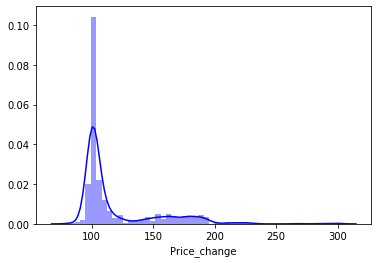

In [194]:
sns.distplot(df3["Price_change"],kde=True,bins=50,color='blue')

This is the histogram of the land price change from 2015. There are two peaks. One is around 103% which means the land price slightly increased the same as five years ago. Another is around 170% which means the land price increased by 70% since 2015.

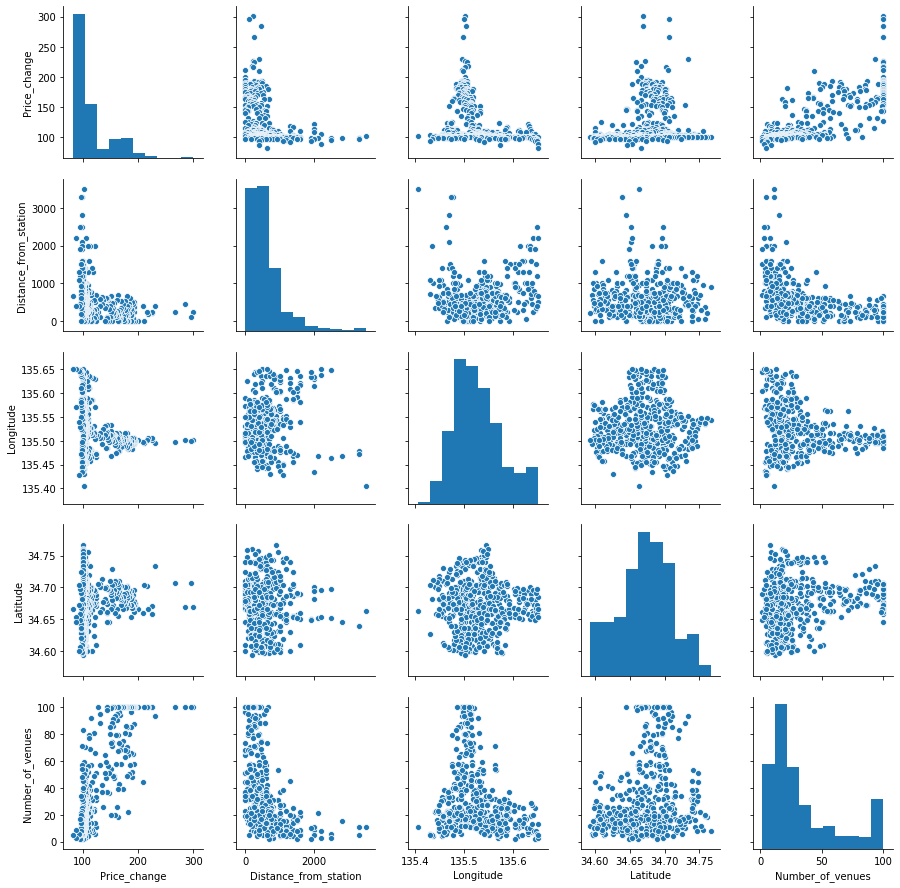

In [203]:
axis_list=["Price_change","Distance_from_station","Longitude","Latitude","Number_of_venues"]
df3_plot=df3[axis_list]
sns.pairplot(df3,x_vars=axis_list,y_vars=axis_list)

# for axis in axis_list:
#     sns.scatterplot(data=df3,x=axis,y="Price_change")

This is a pair plot of the land price change, distance from station, Longitude, Latitude, and the number of venues. From the pair plot, I noticed three things.

1.The land price tends to increase when the distance from a station.

People prefer the place close to a station. However, it has a limited effect on the land price increase possibly because the size of the station matters. People prefer the big station over the small if the land price is the same.

2.City center tends to increase the land price. 

According to the latitude and the longitude versus price change plot,  locations that have the middle in latitude and longitude tend to have a higher land price increase that coincides with the folium plot I presented previously 
Locations with more venues tend to have a higher land price change.

3.The relation between a price change and the number of venues seems to have exponential relation. 

I assume a bigger price change means more people stay or visit the location.  There are two possibilities, one is there are originally some attractive sites which became more popular in 5 years so more people visit as a result, the land price increased. Another is the more people attracted venues to open around the location.

## Methodology

In this report, I compared three major algorisms, Support vector machine(SVM), Elastic net regression, Random forest regression from sklearn. As preprocessing, I used a standard scaler to standardize the explanatory variables from sklearn.Hyper parameters were optimized using GridsearchCV form sklearn.


## Results

In [309]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

In [305]:
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x,y)


In [310]:
x=df3.drop("Address",axis=1).drop("Price_change",axis=1)
y=df3["Price_change"].astype(int)
y2=df3["Price_change"].astype(float)
x2_train, x2_test, y_train, y_test = train_test_split(x_scaled, y2, test_size=0.2)

### Suppot vector machine

In [313]:
param_grid_svm = {'kernel':('linear', 'rbf',"poly","sigmoid"), 'C':[0.001,0.01,0.1,1]}

# svm = svm.SVR()
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm,cv=5)


grid_search_svm.fit(x2_train, y_train)

print('Test set score: {}'.format(grid_search_svm.score(x2_test, y_test)))
print('Best parameters: {}'.format(grid_search_svm.best_params_))
print('Best cross-validation: {}'.format(grid_search_svm.best_score_))

C:\Users\PC_User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PC_User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PC_User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PC_User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

C:\Users\PC_User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PC_User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PC_User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PC_User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

Test set score: 0.6200988623230796
Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation: 0.6469076950459205


C:\Users\PC_User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PC_User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PC_User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PC_User\Anaconda3\lib\site-packages\sklearn\model_selection\_sea

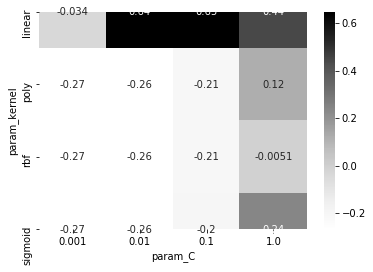

In [315]:
cv_result_svm = pd.DataFrame(grid_search_svm.cv_results_)

cv_result_svm = cv_result_svm[["param_kernel","param_C","mean_test_score"]]
# cv_result_en
cv_result_svm_pivot = pd.pivot_table(cv_result_svm,values="mean_test_score",index="param_kernel",columns="param_C")
# cv_result_en_pivot
heat_map = sns.heatmap(cv_result_svm_pivot, cmap='Greys', annot=True);

For SVM

Test set score: 0.6200988623230796

Best parameters: {'C': 0.1, 'kernel': 'linear'}

Best cross-validation: 0.6469076950459205

### Erastic net regression

In [277]:

param_grid_en = {'alpha':[0.01,0.1,1],"l1_ratio":[0.01,0.1,0.5,0.9,0.99]}

regr = ElasticNet(max_iter=100000)
grid_search_en = GridSearchCV(estimator=regr, param_grid=param_grid_en,cv=10)


grid_search_en.fit(x2_train, y_train)

print('Test set score: {}'.format(grid_search_en.score(x2_test, y_test)))
print('Best parameters: {}'.format(grid_search_en.best_params_))
print('Best cross-validation: {}'.format(grid_search_en.best_score_))

Test set score: 0.6976452767261659
Best parameters: {'alpha': 1, 'l1_ratio': 0.5}
Best cross-validation: 0.6809995620508674


C:\Users\PC_User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


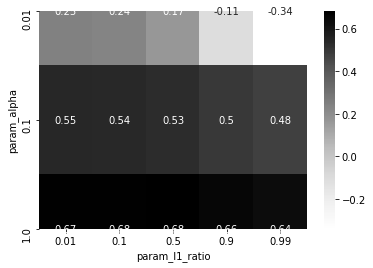

In [299]:
cv_result_en = pd.DataFrame(grid_search_en.cv_results_)

cv_result_en = cv_result_en[["param_alpha","param_l1_ratio","mean_test_score"]]
# cv_result_en
cv_result_en_pivot = pd.pivot_table(cv_result_en ,values="mean_test_score",index="param_alpha",columns="param_l1_ratio")
# cv_result_en_pivot
heat_map = sns.heatmap(cv_result_en_pivot, cmap='Greys', annot=True);

For elastic net regression

Test set score: 0.6976452767261659

Best parameters: {'alpha': 1, 'l1_ratio': 0.5}

Best cross-validation: 0.6809995620508674

### Random forest regression

In [317]:

param_grid = {'max_depth': [2, 3, 4, 5, 6, 7],
              'min_samples_leaf': [1, 3, 5, 7, 10]}

forest_r = RandomForestRegressor(n_estimators=100, random_state=0) #n_estimator/cv is key to increase val score
grid_search_r = GridSearchCV(estimator = forest_r, param_grid=param_grid, cv=10, return_train_score=True)


grid_search_r.fit(x2_train, y_train)

print('Test set score: {}'.format(grid_search_r.score(x2_test, y_test)))
print('Best parameters: {}'.format(grid_search_r.best_params_))
print('Best cross-validation: {}'.format(grid_search_r.best_score_))

C:\Users\PC_User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Test set score: 0.6611572820617911
Best parameters: {'max_depth': 7, 'min_samples_leaf': 3}
Best cross-validation: 0.7282504368466992


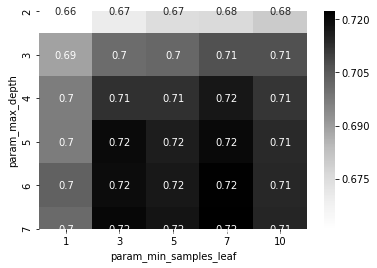

In [300]:
cv_result_r = pd.DataFrame(grid_search_r.cv_results_)

cv_result_r = cv_result_r[["param_max_depth","param_min_samples_leaf","mean_test_score"]]
# cv_result_en
cv_result_r_pivot = pd.pivot_table(cv_result_r,values="mean_test_score",index="param_max_depth",columns="param_min_samples_leaf")
# cv_result_en_pivot
heat_map = sns.heatmap(cv_result_r_pivot, cmap='Greys', annot=True);

For random forest regression

Test set score: 0.7015920479964228

Best parameters: {'max_depth': 7, 'min_samples_leaf': 7}

Best cross-validation: 0.7221997056564007

In [345]:
results=pd.DataFrame({"SVM":[0.6469],"Elastic net":[0.6810],"Random forest":[0.7222]},index=["Best cross-validation"])
results

SVM  Elastic net  Random forest
Best cross-validation  0.6469        0.681         0.7222

As a result, the random forest regressor achieved the best cross-validation score among the three.
So I adopted the random forest regressor as a prediction algorithm.
For further detail. I checked all feature importances.

In [366]:
forest_best=RandomForestRegressor(n_estimators=100, random_state=0,max_depth= 7, min_samples_leaf=7)
forest_para_list=forest_best.fit(x2_train,y_train).feature_importances_
forest_para_list=np.sort(forest_para_list)[::-1]
# print(forest_para_list)

In [368]:
# print('Feature Importances:')
feat_name=[]
imp=[]
imp_acc=[]
for i, feat in enumerate(x.columns.values):
#     print('\t{0:10s} : {1:>.6f}'.format(feat, forest_para_list[i]))
    feat_name.append(feat)
    imp.append(forest_para_list[i])
    if i==0:
        imp_acc.append(forest_para_list[i])
    else:
        imp_acc.append(forest_para_list[i]+imp_acc[i-1])

In [369]:
summary=pd.DataFrame([feat_name,imp,imp_acc],index=["Feature","importance","accumated_importance"]).T
summary.head(10)


Feature  importance accumated_importance
0  Distance_from_station    0.686563             0.686563
1              Longitude   0.0484869              0.73505
2               Latitude   0.0468252             0.781875
3       Number_of_venues    0.040752             0.822627
4                    ATM   0.0252308             0.847858
5    American Restaurant   0.0237962             0.871654
6           Antique Shop   0.0142027             0.885857
7                 Arcade   0.0117259             0.897582
8            Art Gallery  0.00744301             0.905025
9             Art Museum  0.00641934             0.911445

In [370]:
summary.to_csv("summary.csv")

### Discussion

 In the result section, I conclude Random Forest regression was the best algorithm and seven factors affect the land price increase. 

The biggest is the distance from the closest station implies accessibility to the location is the biggest concern when you choose the land. Having better accessibly attracted more people to visit and business for over the last five years. 

2nd is longitude and latitude. it means the city center is the key factor as well as we can see from the folium map. There is a tendency for people to concentrate on originally popular places to visit or invest.


3rd factor is the total number of venues.  It implies the land price increase occurred in commercial areas where more people register venue information to folium. ATM and arcade appeared in the top 10 features that support this idea. I should mention that the land price increase occurred, more specifically, in the shopping area. 

An interesting fact is that American restaurants, antique shops, and art-related facilities are also some impacts on the land price increase. I think those venues are for wealthy people.  It implies the concentration of wealth happened, in short, rich people became richer and the land price increased in some way.

# Conclusion

In this report, I investigate the land price increase over the last five years with geographical features, accessibility, and venue information using Random forest regression. I found there are 4 factors to increase the land price, accessibility, city center, number of venues, and wealthy neighborhood. And I got high predictability( 0.7222 ). I will use this insight to invest next time.